In [1]:
from astropy.table import Table, Column
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import pairplot
from sklearn.cluster import DBSCAN
from numpy.linalg import norm
from scipy.spatial import distance
# Assuming you have located the table fits file in the same directory 
tab = Table.read('data/DR16Q_v4.fits')
tab.colnames
psfflux = np.array(tab['PSFFLUX'])
Fu = psfflux[:,0]
Fg = psfflux[:,1]
Fr = psfflux[:,2]
Fi = psfflux[:,3]
Fz = psfflux[:,4]

#  SDSS flux inverse variance
psfflux_ivar = tab['PSFFLUX_IVAR']
psfflux_SN = psfflux*psfflux_ivar


# SDSS FLux Signal tp Noise -> Flux*(1/Flux_variance)
Fu_SN = psfflux_SN[:,0]
Fu_SN = psfflux_SN[:,0]
Fg_SN = psfflux_SN[:,1]
Fr_SN = psfflux_SN[:,2]
Fi_SN = psfflux_SN[:,3]
Fz_SN = psfflux_SN[:,4]

# WISE fluxes
W1_Flux = tab['W1_FLUX']
W2_Flux = tab['W2_FLUX']

# Wise Flux inverse variance 
W1_Flux_ivar = tab['W1_FLUX_IVAR']
W2_Flux_ivar = tab['W2_FLUX_IVAR']

W1_SN, W2_SN = W1_Flux*W1_Flux_ivar, W2_Flux*W1_Flux_ivar

#  Other features 
redshift = tab['Z']
zwarning = tab['ZWARNING']
e=2
mask = (Fu_SN>e) & (Fg_SN>e) & (Fr_SN>e) & (Fi_SN>e) &(Fz_SN>e) & (redshift>0) & (zwarning==0)   & (W1_SN>e) & (W2_SN>e) 
print(sum(mask))
print(min(redshift[mask]), max(redshift[mask]), np.median(redshift[mask]))
#  SDSS-SDSS flux ratios
Fug = np.log(Fu[mask]/Fg[mask])
Fur = np.log(Fu[mask]/Fr[mask])
Fui = np.log(Fu[mask]/Fi[mask])
Fuz = np.log(Fu[mask]/Fz[mask])
Fgr = np.log(Fg[mask]/Fr[mask])
Fgi = np.log(Fg[mask]/Fi[mask])
Fgz = np.log(Fg[mask]/Fz[mask])
Fri = np.log(Fr[mask]/Fi[mask])
Frz = np.log(Fr[mask]/Fz[mask])
Fiz = np.log(Fi[mask]/Fz[mask])

# WISE-WISE flux ratios
FW1W2 = np.log(W1_Flux[mask]/W2_Flux[mask])

# SDSS-WISE flux ratios
FuW1 = np.log(Fu[mask]/W1_Flux[mask])
FuW2 = np.log(Fu[mask]/W2_Flux[mask])
FgW1 = np.log(Fg[mask]/W1_Flux[mask])
FgW2 = np.log(Fg[mask]/W2_Flux[mask])
FrW1 = np.log(Fr[mask]/W1_Flux[mask])
FrW2 = np.log(Fr[mask]/W2_Flux[mask])
FiW1 = np.log(Fi[mask]/W1_Flux[mask])
FiW2 = np.log(Fi[mask]/W2_Flux[mask])
FzW1 = np.log(Fz[mask]/W1_Flux[mask])
FzW2 = np.log(Fz[mask]/W2_Flux[mask])
data = np.array(list(zip(Fui,Fuz,FuW1,FuW2,Fgz,FgW1,FgW2,FrW1,FrW2,FiW2)))
data_scaled = StandardScaler().fit_transform(data)
df = pd.DataFrame(data=data_scaled, columns=['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
#df = pd.DataFrame(data=data_scaled, columns=[ 'FW1W2','FuW1','FgW1', 'FrW1', 'FiW1', 'FzW1', 'FuW2', 'FgW2', 'FrW2', 'FiW2', 'FzW2'])
print(df.head())

144582
0.004153252579271793 7.011244773864746 1.1326341032981873
        Fui       Fuz      FuW1      FuW2       Fgz      FgW1      FgW2  \
0  0.436092  0.389854  0.427525  0.367582  0.446076  0.401342  0.315095   
1  0.609372  0.518287  1.458968  1.326332  0.159813  1.398188  1.193396   
2 -0.242792 -0.194903 -0.034337 -0.467140 -0.223497  0.020784 -0.504167   
3  0.399934  0.265061 -0.161991 -0.280287  0.192551 -0.346825 -0.497565   
4 -1.103255 -0.922966 -0.780236 -1.200414 -1.221349 -0.753590 -1.244677   

       FrW1      FrW2      FiW2  
0  0.372280  0.273568  0.068571  
1  1.455461  1.234102  1.317567  
2  0.102368 -0.499317 -0.432786  
3 -0.309674 -0.484347 -0.865260  
4 -0.179549 -0.711942 -0.580097  


In [ ]:
pointId=1
points=[]
large=0
#for j in range(len(df)):
     #count=0
     #large=large+1
     #for i in range(len(df)):
        #Euclidian distance using L2 Norm
            #x=distance.euclidean(df[i:i+1],df[j:j+1])
                #points.append(i)
            #print(x)
            #count=count+1
            #print(large)
            #print(count)
            #print(j,i)
            
db=DBSCAN(eps=2,min_samples=10)
model=db.fit(df)
label=model.labels_

In [ ]:
plt.hist(label[label>0])
# plt.hist(label)
plt.show()
max(label)
min(label)

In [ ]:
np.size(label)

In [ ]:
print(sum(label[label==-1]))

In [12]:
from sklearn.decomposition import PCA
import seaborn as sns
data_with_clust = pd.concat([test,pd.DataFrame({'cluster':label})], axis = 1)
#print(data_with_clust.head())
outlier=data_with_clust[data_with_clust['cluster']!=0]
#print(outlier.head())
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(test)
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':label})], axis = 1)
print(pca_df.head())

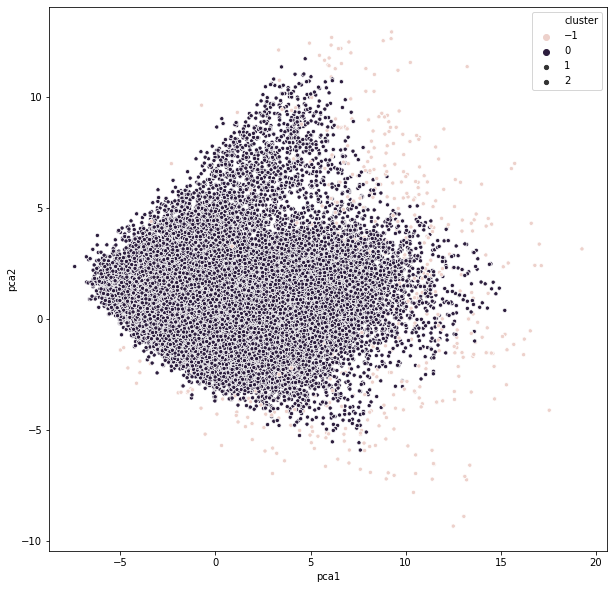

658


In [13]:
plt.figure(figsize=(10,10))
filt=(pca_df['cluster']<1)
#print(pca_df[filt].head())
#ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df[filt])

x = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, size=2)

plt.show()
print(len(outlier))